<div style="color:White;
            display:fill;
            border-radius:10px;
            background-color:#063d45;
            font-size:80%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:White;
              text-align:center;'>
        PREDICTING Agrofood Carbon dioxide emission with Regression Models
    </h1>
    </div>

# Loading Packages

In [1]:
# The libraries that we used for data loading, manipulation and analysis

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import numpy as np
import pandas as pd
from numpy import array
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

# Loading Dataset 

In [2]:
# loading dataset
df = pd.read_csv('Agrofood_co2_emission.csv')

<a id='understanding'></a>
# Understanding the agrofood CO2 emission

In [3]:
df.shape

(6965, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna fires                    6934 non-null   float64
 3   Forest fires                     6872 non-null   float64
 4   Crop Residues                    5576 non-null   float64
 5   Rice Cultivation                 6965 non-null   float64
 6   Drained organic soils (CO2)      6965 non-null   float64
 7   Pesticides Manufacturing         6965 non-null   float64
 8   Food Transport                   6965 non-null   float64
 9   Forestland                       6472 non-null   float64
 10  Net Forest conversion            6472 non-null   float64
 11  Food Household Consumption       6492 non-null   float64
 12  Food Retail         

In [4]:
# Print the summary statistics of the dataset
print("\nSummary statistics of the dataset:")
print(df.describe().T)


Summary statistics of the dataset:
                                  count          mean           std  \
Year                             6965.0  2.005125e+03  8.894665e+00   
Savanna fires                    6934.0  1.188391e+03  5.246288e+03   
Forest fires                     6872.0  9.193022e+02  3.720079e+03   
Crop Residues                    5576.0  9.987063e+02  3.700345e+03   
Rice Cultivation                 6965.0  4.259667e+03  1.761383e+04   
Drained organic soils (CO2)      6965.0  3.503229e+03  1.586145e+04   
Pesticides Manufacturing         6965.0  3.334184e+02  1.429159e+03   
Food Transport                   6965.0  1.939582e+03  5.616749e+03   
Forestland                       6472.0 -1.782829e+04  8.183221e+04   
Net Forest conversion            6472.0  1.760564e+04  1.011575e+05   
Food Household Consumption       6492.0  4.847580e+03  2.578914e+04   
Food Retail                      6965.0  2.043211e+03  8.494249e+03   
On-farm Electricity Use          6965.0  

# Data Cleaning

In [5]:
# check for duplicated rows

def check_for_duplicate_rows(df):
    '''
    Display the duplicate rows (if any) in a DataFrame.

    Parameters:
    df (pandas.DataFrame): The DataFrame to check for duplicate rows.

    Returns:
    No return value. If duplicated rows are found these are printed to the screen
    '''
    if df.duplicated().sum() == 0:
        print("No duplicated rows found")
    else:
        duplicated_rows = df[df.duplicated()]
        display(duplicated_rows)


check_for_duplicate_rows(df)

No duplicated rows found


In [10]:
# check the dataframe for null values

def check_for_null_values(df):
    '''
    Display the number of null (missing / nan) values in a DataFrame.

    This function calculates the total number of null values in the DataFrame by calling the `isnull()` method,
    which marks nulls as `True`, and then sums these cases per column.

    Parameters:
    df (pandas.DataFrame): The DataFrame to check for missing values.

    Returns:
    No return value. Prints the number of missing values per column to the screen
    '''
    missing_values = df.isnull().sum()
    if missing_values.any():
        print("Missing values found in these columns:")
        missing_values = df.isnull().sum()
        display(missing_values[missing_values > 0])
    else:
        print("No null (missing) values found")

check_for_null_values(df)

# check for missing (null) values in each column
# missing_values = df.isnull().sum()

# display columns with missing values
# display(missing_values)
# display(missing_values[missing_values > 0])

Missing values found in these columns:


Savanna fires                        31
Forest fires                         93
Crop Residues                      1389
Forestland                         4511
Net Forest conversion               493
Food Household Consumption          473
IPPU                                743
Manure applied to Soils             928
Manure Management                   928
Fires in humid tropical forests     155
On-farm energy use                  956
dtype: int64

In [11]:
def check_for_conditional_values(df, condition, value):
    '''
    Display the number of values in each column that matches the provided condition and value.
    Used to identify columns that contain unexpected values e.g. -1 values where the value should be nan 
    e.g check_for_conditional_values(df, "==", -1 ) will print number of records containing "-1"

    Parameters:
    df (pandas.DataFrame): The DataFrame to check for duplicate rows.
    condition:  The condition or operator to be used "<", "<=", "==", ">=", or ">" are valid
    value: The value to be used with the condition. Any integer can be used.

    Returns:
    No return value. The count of values matching the expression per column is printed to the screen.
    "e.g
    '''
    print(f"Checking columns with values {condition} {value}")
    for col in df.columns:
        if df[col].dtype in ["float64", "int64"]:
            if condition == "<":
                matching_values = df[col] < value
            elif condition == "<=":
                matching_values = df[col] <= value
            elif condition == "==":
                matching_values = df[col] == value
            elif condition == ">=":
                matching_values = df[col] >= value
            elif condition == ">":
                matching_values = df[col] > value
            else:
                print("Invalid conditional operator specified")
                return
            # print(matching_values)
            count_matches = matching_values.sum()
        
            if count_matches > 0:
                print(f"{col} has {count_matches} values matching condition {condition} {value}")
            else:
                pass
                # print(f"{col} has no values matching condition {condition} {value}")

In [12]:
#check_for_conditional_values(df, "<", 0)
check_for_conditional_values(df, "<", -1)

Checking columns with values < -1
total_emission has 238 values matching condition < -1
Average Temperature °C has 14 values matching condition < -1


In [13]:
df.loc[df['Forestland'] < -1, 'Forestland'] = np.nan

In [14]:
check_for_null_values(df)

Missing values found in these columns:


Savanna fires                        31
Forest fires                         93
Crop Residues                      1389
Forestland                         4511
Net Forest conversion               493
Food Household Consumption          473
IPPU                                743
Manure applied to Soils             928
Manure Management                   928
Fires in humid tropical forests     155
On-farm energy use                  956
dtype: int64

In [15]:
df['Forestland'] = df['Forestland'].astype(str)
df['Forestland'].replace('', np.nan, inplace=True)
df['Net Forest conversion'] = df['Net Forest conversion'].astype(str)
df['Net Forest conversion'].replace('', np.nan, inplace=True)

check_for_null_values(df)


Missing values found in these columns:


Savanna fires                        31
Forest fires                         93
Crop Residues                      1389
Food Household Consumption          473
IPPU                                743
Manure applied to Soils             928
Manure Management                   928
Fires in humid tropical forests     155
On-farm energy use                  956
dtype: int64

In [16]:
#replacing missing values with nan

df['Savanna fires'] = df['Savanna fires'].astype(str)
df['Savanna fires'].replace('', np.nan, inplace=True)
df['Forest fires'] = df['Forest fires'].astype(str)
df['Forest fires'].replace('', np.nan, inplace=True)
df['Fires in humid tropical forests'] = df['Fires in humid tropical forests'].astype(str)
df['Fires in humid tropical forests'].replace('', np.nan, inplace=True)


check_for_null_values(df)

Missing values found in these columns:


Crop Residues                 1389
Food Household Consumption     473
IPPU                           743
Manure applied to Soils        928
Manure Management              928
On-farm energy use             956
dtype: int64

In [17]:
#replacing missing values with average

df['Crop Residues'].fillna(value=df['Crop Residues'].mean(), inplace=True)
df['Food Household Consumption'].fillna(value=df['Food Household Consumption'].mean(), inplace=True)
df['IPPU'].fillna(value=df['IPPU'].mean(), inplace=True)
df['Manure applied to Soils'].fillna(value=df['Manure applied to Soils'].mean(), inplace=True)
df['Manure Management'].fillna(value=df['Manure Management'].mean(), inplace=True)
df['On-farm energy use'].fillna(value=df['On-farm energy use'].mean(), inplace=True)
check_for_null_values(df)

No null (missing) values found


In [18]:
df.describe().T

count          mean           std  \
Year                             6965.0  2.005125e+03  8.894665e+00   
Crop Residues                    6965.0  9.987063e+02  3.310818e+03   
Rice Cultivation                 6965.0  4.259667e+03  1.761383e+04   
Drained organic soils (CO2)      6965.0  3.503229e+03  1.586145e+04   
Pesticides Manufacturing         6965.0  3.334184e+02  1.429159e+03   
Food Transport                   6965.0  1.939582e+03  5.616749e+03   
Food Household Consumption       6965.0  4.847580e+03  2.489794e+04   
Food Retail                      6965.0  2.043211e+03  8.494249e+03   
On-farm Electricity Use          6965.0  1.626681e+03  9.343182e+03   
Food Packaging                   6965.0  1.658630e+03  1.148134e+04   
Agrifood Systems Waste Disposal  6965.0  6.018445e+03  2.215674e+04   
Food Processing                  6965.0  3.872724e+03  1.983822e+04   
Fertilizers Manufacturing        6965.0  3.035723e+03  1.169303e+04   
IPPU                             6965.0  1.999150e+04  1.053094e+05   
Manure applied to Soils          6965.0  9.232256e+02  3.004299e+03   
Manure left on Pasture           6965.0  3.518027e+03  9.103556e+03   
Manure Management                6965.0  2.263345e+03  7.429809e+03   
Fires in organic soils           6965.0  1.210316e+03  2.266985e+04   
On-farm energy use               6965.0  3.008982e+03  1.173841e+04   
Rural population                 6965.0  1.785774e+07  8.901521e+07   
Urban population                 6965.0  1.693230e+07  6.574362e+07   
Total Population - Male          6965.0  1.761963e+07  7.603993e+07   
Total Population - Female        6965.0  1.732447e+07  7.251711e+07   
total_emission                   6965.0  6.409124e+04  2.283130e+05   
Average Temperature °C           6965.0  8.729891e-01  5.559295e-01   

                                           min            25%           50%  \
Year                               1990.000000    1997.000000  2.005000e+03   
Crop Residues                         0.000200      25.360100  1.930831e+02   
Rice Cultivation                      0.000000     181.260800  5.348174e+02   
Drained organic soils (CO2)           0.000000       0.000000  0.000000e+00   
Pesticides Manufacturing              0.000000       6.000000  1.300000e+01   
Food Transport                        0.000100      27.958600  2.049628e+02   
Food Household Consumption            0.000000      13.797400  2.231490e+02   
Food Retail                           0.000000      26.818500  1.720426e+02   
On-farm Electricity Use               0.000000       8.037600  2.912070e+01   
Food Packaging                        0.000000      67.631366  7.401813e+01   
Agrifood Systems Waste Disposal       0.340000      86.680500  9.012757e+02   
Food Processing                       0.000100     209.587728  3.447602e+02   
Fertilizers Manufacturing             0.001900     360.358799  1.115052e+03   
IPPU                                  0.000000      51.930700  1.338400e+03   
Manure applied to Soils               0.049000      23.119500  1.892829e+02   
Manure left on Pasture                0.000700     139.669900  9.725674e+02   
Manure Management                     0.432900      52.707800  4.272171e+02   
Fires in organic soils                0.000000       0.000000  0.000000e+00   
On-farm energy use                    0.031900      17.738200  2.825279e+02   
Rural population                      0.000000   97311.000000  1.595322e+06   
Urban population                      0.000000  217386.000000  2.357581e+06   
Total Population - Male             250.000000  201326.000000  2.469660e+06   
Total Population - Female           270.000000  207890.000000  2.444135e+06   
total_emission                  -391884.056300    5221.243741  1.214765e+04   
Average Temperature °C               -1.415833       0.511333  8.343000e-01   

                                          75%           max  
Year                             2.013000e+03  2.020000e+03  
Crop Res

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna fires                    6965 non-null   object 
 3   Forest fires                     6965 non-null   object 
 4   Crop Residues                    6965 non-null   float64
 5   Rice Cultivation                 6965 non-null   float64
 6   Drained organic soils (CO2)      6965 non-null   float64
 7   Pesticides Manufacturing         6965 non-null   float64
 8   Food Transport                   6965 non-null   float64
 9   Forestland                       6965 non-null   object 
 10  Net Forest conversion            6965 non-null   object 
 11  Food Household Consumption       6965 non-null   float64
 12  Food Retail         

In [20]:
df.to_csv('Agrofood_co2_emission_clean.csv')

# Exploratory Data Analysis

In [21]:
df.columns

Index(['Area', 'Year', 'Savanna fires', 'Forest fires', 'Crop Residues',
       'Rice Cultivation', 'Drained organic soils (CO2)',
       'Pesticides Manufacturing', 'Food Transport', 'Forestland',
       'Net Forest conversion', 'Food Household Consumption', 'Food Retail',
       'On-farm Electricity Use', 'Food Packaging',
       'Agrifood Systems Waste Disposal', 'Food Processing',
       'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
       'Manure left on Pasture', 'Manure Management', 'Fires in organic soils',
       'Fires in humid tropical forests', 'On-farm energy use',
       'Rural population', 'Urban population', 'Total Population - Male',
       'Total Population - Female', 'total_emission',
       'Average Temperature °C'],
      dtype='object')

In [24]:
y_2000 = df.loc[df["Year"]==2000]
kt_2000 =y_2000["total_emission"].sum()
gt_2000 = round(kt_2000 / 1_000_000,2) # the amount of gigatones of CO2
perc = gt_2000 / 30
print(f"The amount of CO2 from agrifood in 2000 is {gt_2000} gigatones (gt), that is:",round(perc * 100), "%","of total emissions!")

The amount of CO2 from agrifood in 2000 is 12.38 gigatones (gt), that is: 41 % of total emissions!


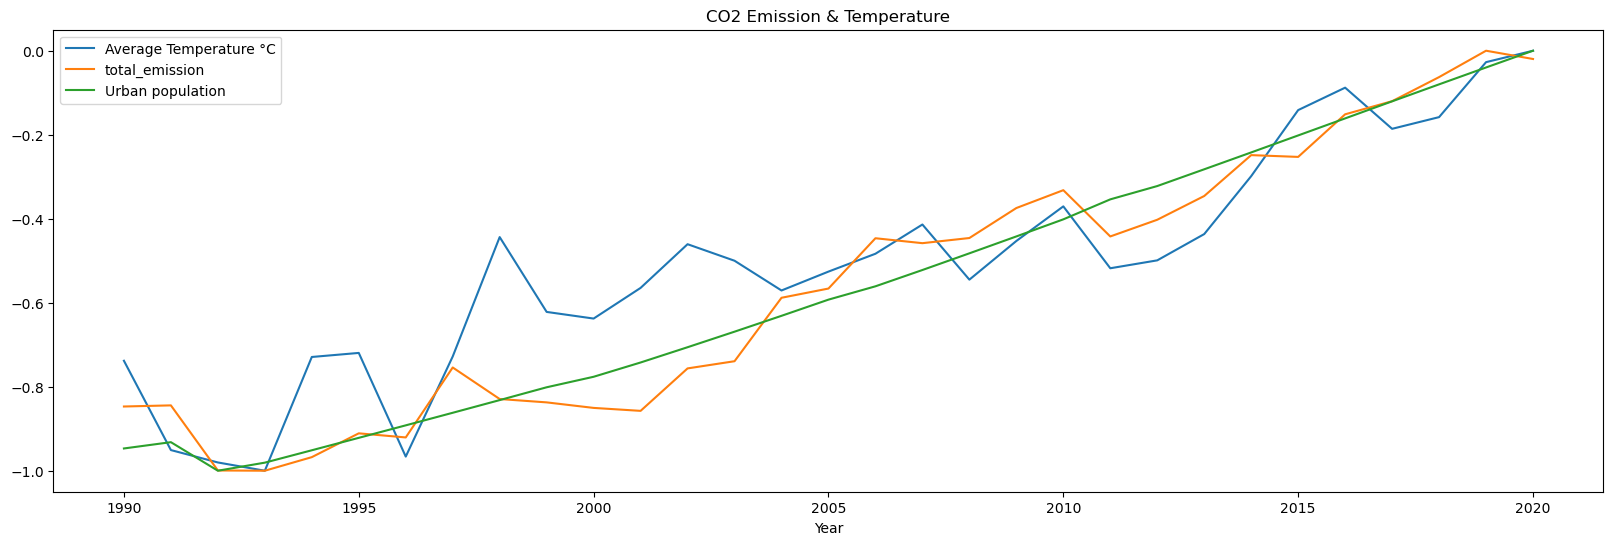

In [25]:
def normalizer(df):
    norm = (df - df.max()) / (df.max() - df.min())
    return norm

temp_emission = df.groupby("Year").agg({"Average Temperature °C": "mean", "total_emission": "mean", "Urban population": "mean"})
norm_temp = normalizer(temp_emission)


norm_temp.plot(figsize=(20, 6))
plt.title("CO2 Emission & Temperature")
plt.show()

# Insights

## Overall Trend

* Temperature: There appears to be an overall upward trend in average temperature over the years, with a notable increase between the years 2015 and 2020.
* CO2 Emission: Similarly, the total CO2 emission also shows an increasing trend, particularly between 2011 and 2016.
* Urban Population: The urban population seems to be growing steadily over time, with a significant increase between 1995 and 2020.

## Relationship Between Variables

* Temperature & CO2 Emission: Both temperature and CO2 emission seem to be positively correlated. As CO2 emissions increase, there is a corresponding increase in temperature. This aligns with the well-established scientific understanding of the greenhouse effect.

## Additional Observations

* Temperature Fluctuations: There are year-to-year fluctuations in temperature, likely influenced by factors like El Nino/La Nina events or volcanic activity.

* Urban Population Impact: While the urban population is increasing, its direct impact on temperature and CO2 emission is not explicitly shown in this graph.

## Summary

The graph provides a visual representation of the increasing global temperature and CO2 emissions over time. The positive correlation between these two variables supports the scientific consensus that human activities, primarily the burning of fossil fuels, are contributing to climate change.

In [29]:
def plot_co2_trend(nation):
    ita = df.loc[df.Area == nation]
    ita = ita.set_index("Year")
    plt.figure(figsize=(12,6))
    ita["total_emission"].plot(kind = "line", color = "green")
    plt.title(f"{nation} CO2 trend")
    plt.show()

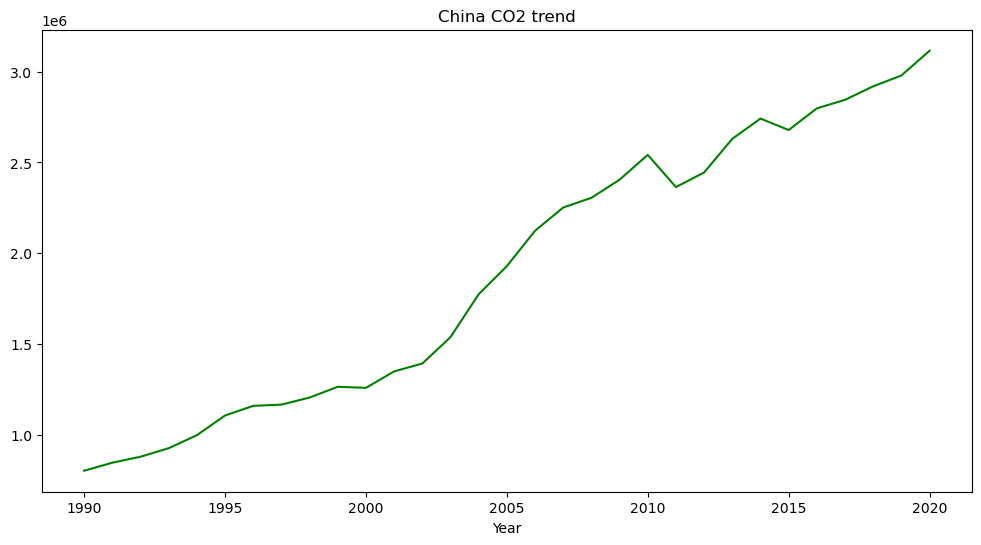

In [31]:
plot_co2_trend('China')

# Insights

## Overall Trend

* There is a clear upward trend in China's CO2 emissions over the years. The emissions have been steadily increasing since the early 1990s.

## Specific Observations

* Early 1990s to Early 2000s: During this period, the growth in CO2 emissions was relatively moderate.
* Early 2000s to Late 2000s: There was a significant acceleration in the growth of CO2 emissions during this period.
* The growth rate of CO2 emissions slowed down slightly in the year 2010.
* 2010 to 2015: This period witnessed a rapid increase in CO2 emissions, with a peak around 2015.
* 2015 to 2020:  There was a slight decline in the growth rate of CO2 emissions, but they still continued to rise.

## Summary

* The graph highlights China's significant contribution to global CO2 emissions, particularly in recent decades. The rapid growth in emissions is likely linked to the country's rapid economic development and increased reliance on fossil fuels for energy generation.


In [28]:
import plotly.express as px
fig = px.box(df, x=df['Year'],
             y=['Average Temperature °C'],
             color=df['Year'],
             color_discrete_sequence=px.colors.sequential.Viridis,
             title='<b>Average temperature distribution by years')
fig.show()

# Insights

## Overall Trend

* Temperature Distribution: The graph depicts the distribution of average temperatures over the years 1990 to 2020. Each year is represented by a box plot, showing the median temperature, the interquartile range, and the outliers.

## Specific Observations

* Central Tendency: The median temperature appears to be increasing over the years. This is evident from the upward shift of the lines within the boxes.
* Spread: The spread of temperatures (as represented by the box size) seems to be relatively consistent across the years, indicating that the variability in temperatures hasn't changed significantly.
* Outliers: There are some outliers present in the data, especially in the earlier years (around 1990-1992). These outliers represent years with exceptionally high or low temperatures compared to the general trend.

## Possible Explanations

* Climate Change: The increasing median temperature over the years could be attributed to the ongoing trend of global warming.
* Natural Variability: The consistent spread of temperatures suggests that natural factors like weather patterns and ocean currents continue to influence year-to-year variations in temperature.

## Summary

The graph suggests a general upward trend in average temperatures over the years. This trend is consistent with the observed global warming phenomenon. However, it's important to note that natural variability still plays a significant role in year-to-year temperature fluctuations.

In [32]:
df["pop_tot"] = df["Total Population - Male"] + df["Total Population - Female"]
print(df["pop_tot"])

0       10694796.0
1       10745167.0
2       12057433.0
3       14003760.0
4       15455554.0
           ...    
6960    14452705.0
6961    14751102.0
6962    15052183.0
6963    15354607.0
6964    15669667.0
Name: pop_tot, Length: 6965, dtype: float64


In [33]:
continent_mapping = {
    'Africa': ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo', 'Côte d\'Ivoire', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'São Tomé and Príncipe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe'],
    'Asia': ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia', 'China', 'Cyprus', 'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestine', 'Philippines', 'Qatar', 'Russia', 'Saudi Arabia', 'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Taiwan', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen'],
    'Europe': ['Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom', 'Vatican City'],
    'North America': ['Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Canada', 'Costa Rica', 'Cuba', 'Dominica', 'Dominican Republic', 'El Salvador', 'Grenada', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Trinidad and Tobago', 'United States'],
    'Oceania': ['Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia', 'Nauru', 'New Zealand', 'Palau', 'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu'],
    'South America': ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela']
}

#This function assign a continent label to each country in the df
def assign_continent(country):
    for continent, countries in continent_mapping.items():
        if country in countries:
            return continent
    return None

df["continent"] = df["Area"].apply(assign_continent)

In [34]:
px.scatter(df, df["Average Temperature °C"],
           df["total_emission"], 
           size= "pop_tot", 
           title = "<b>CO2 Emission & Temperature - population", 
           template="plotly_dark", 
           color ="continent")

# Insights

## Overall Trend

* Population and CO2 Emission: There seems to be a positive correlation between population and total CO2 emissions. As the population of a region increases, their CO2 emissions tend to increase as well.

## Specific Observations

Continent-wise Distribution:
* Asia: Asia has a significant cluster of data points with both high populations and high CO2 emissions.
* Europe: Europe also has a cluster of data points, but with lower CO2 emissions compared to Asia for similar population sizes.
* North America: North America has a few data points with relatively high CO2 emissions, even though the population is not as high as Asia or Europe.

Africa, South America, and Oceania: These continents have data points scattered across the lower range of population and CO2 emissions.
* Outliers: There are a few outliers visible, particularly in the lower range of population and CO2 emissions. These could be due to various factors like specific country policies, economic activities, or energy sources.

## Possible Explanations

* Economic Development: Countries with higher populations and higher CO2 emissions are often more industrialized and have higher energy consumption per capita.
* Energy Sources: The type of energy sources used (e.g., fossil fuels vs. renewable energy) can significantly impact CO2 emissions.
* Government Policies: Government policies and regulations related to environmental protection and energy efficiency can influence CO2 emissions.
 
## Summary
The graph suggests that there is a strong correlation between population and CO2 emissions, with Asia being the continent with the highest emissions. The differences between continents can be attributed to factors like economic development, energy sources, and government policies.

In [35]:
correlation = df.groupby(["Year"]).agg({"total_emission":"sum", "Average Temperature °C":"mean", "pop_tot":"sum"})
correlation.corr()

total_emission  Average Temperature °C   pop_tot
total_emission                1.000000                 0.90552  0.981828
Average Temperature °C        0.905520                 1.00000  0.912050
pop_tot                       0.981828                 0.91205  1.000000

In [36]:
px.scatter(correlation.reset_index(),    
    x = "total_emission", 
    y = "Average Temperature °C", 
    size = "pop_tot",
    color = "Year", 
    title = "<br> Temperature & CO2 Emissions - global relation",
    template="plotly_dark")

# Insights

## Overall Trend
Correlation between Temperature and CO2 Emissions: The graph suggests a strong positive correlation between average global temperature and total CO2 emissions. As CO2 emissions increase, there is a corresponding increase in global temperature.

## Specific Observations
* Time Trend: The color gradient of the data points indicates a time trend. We can see that as we move from the earlier years (represented by darker colors) to the later years (represented by lighter colors), both CO2 emissions and temperature have increased.
* 1990-1995:  There was a moderate increase in CO2 emissions and temperature during this period.
* 1995-2000: The rate of increase in both CO2 emissions and temperature accelerated.
* 2000-2005:  The trend of increasing CO2 emissions and temperature continued, but with a slightly slower rate.
* 2005-2010: A more pronounced increase in both CO2 emissions and temperature is observed.
* 2010-2015:  The trend of increasing CO2 emissions and temperature continues, with a slight acceleration.
* 2015-2020:  The most significant increase in both CO2 emissions and temperature occurs during this period.
* Outliers: There are a few data points that deviate from the general trend. These could be due to various factors like volcanic eruptions, El Niño/La Niña events, or specific economic events that might have temporarily affected CO2 emissions or temperature.

## Possible Explanations
Greenhouse Effect: The increase in CO2 emissions contributes to the greenhouse effect, trapping more heat in the atmosphere and leading to a rise in global temperatures.
Human Activities: Human activities, such as the burning of fossil fuels for energy and industrial processes, are the primary drivers of increased CO2 emissions.
    
## Summary
The graph provides a clear visual representation of the relationship between global temperature and CO2 emissions, highlighting the significant increase in both over the years. The strong positive correlation supports the scientific consensus that human activities are contributing to climate change.

In [37]:
fig = px.scatter_3d(df.groupby(["continent","Year"])\
                    .agg({"total_emission":"sum", 
                          "Average Temperature °C":"mean", 
                          "pop_tot":"sum"}).reset_index(),
                          z = "total_emission", 
                          y = "Average Temperature °C", 
                          x = "Year",
                          color="continent",
                          size = "pop_tot",
                           title = "<br> Temperature & CO2 Emissions - per Continent and Year")
fig.show()

# Insights

## Overall Trend

Correlation between Temperature, CO2 Emissions, and Time: The graph suggests a positive correlation between average global temperature, total CO2 emissions, and time. As CO2 emissions and time increase, there is a corresponding increase in global temperature.

## Specific Observations

### Continent-wise Distribution:
* Asia: Asia has a significant cluster of data points with both high CO2 emissions and temperature, especially in recent years.
* Europe: Europe also has a cluster of data points, but with lower CO2 emissions and temperature compared to Asia.
* North America: North America has a few data points with relatively high CO2 emissions and temperature, particularly in the later years.
* Africa, South America, and Oceania: These continents have data points scattered across the lower range of CO2 emissions and temperature.

### Time Trend:

* 1990-1995:  There was a moderate increase in CO2 emissions and temperature across all continents during this period.
* 1995-2000: The rate of increase in both CO2 emissions and temperature accelerated, particularly for Asia and North America.
* 2000-2005:  The trend of increasing CO2 emissions and temperature continued, with a slight acceleration for Asia.
* 2005-2010: A more pronounced increase in both CO2 emissions and temperature is observed for Asia and North America.
* 2010-2015:  The trend of increasing CO2 emissions and temperature continues, with a slight acceleration for Asia and North America.
* 2015-2020:  The most significant increase in both CO2 emissions and temperature occurs during this period, particularly for Asia.

## Possible Explanations

* Greenhouse Effect: The increase in CO2 emissions contributes to the greenhouse effect, trapping more heat in the atmosphere and leading to a rise in global temperatures.
* Human Activities: Human activities, such as the burning of fossil fuels for energy and industrial processes, are the primary drivers of increased CO2 emissions.
* Economic Development: The economic development of countries, particularly in Asia, has led to increased energy consumption and CO2 emissions.
    
## Summary
The graph provides a clear visual representation of the relationship between global temperature, CO2 emissions, and time, highlighting the significant increase in both over the years 1990-2020, particularly for Asia and North America. The strong positive correlation supports the scientific consensus that human activities are contributing to climate change.    

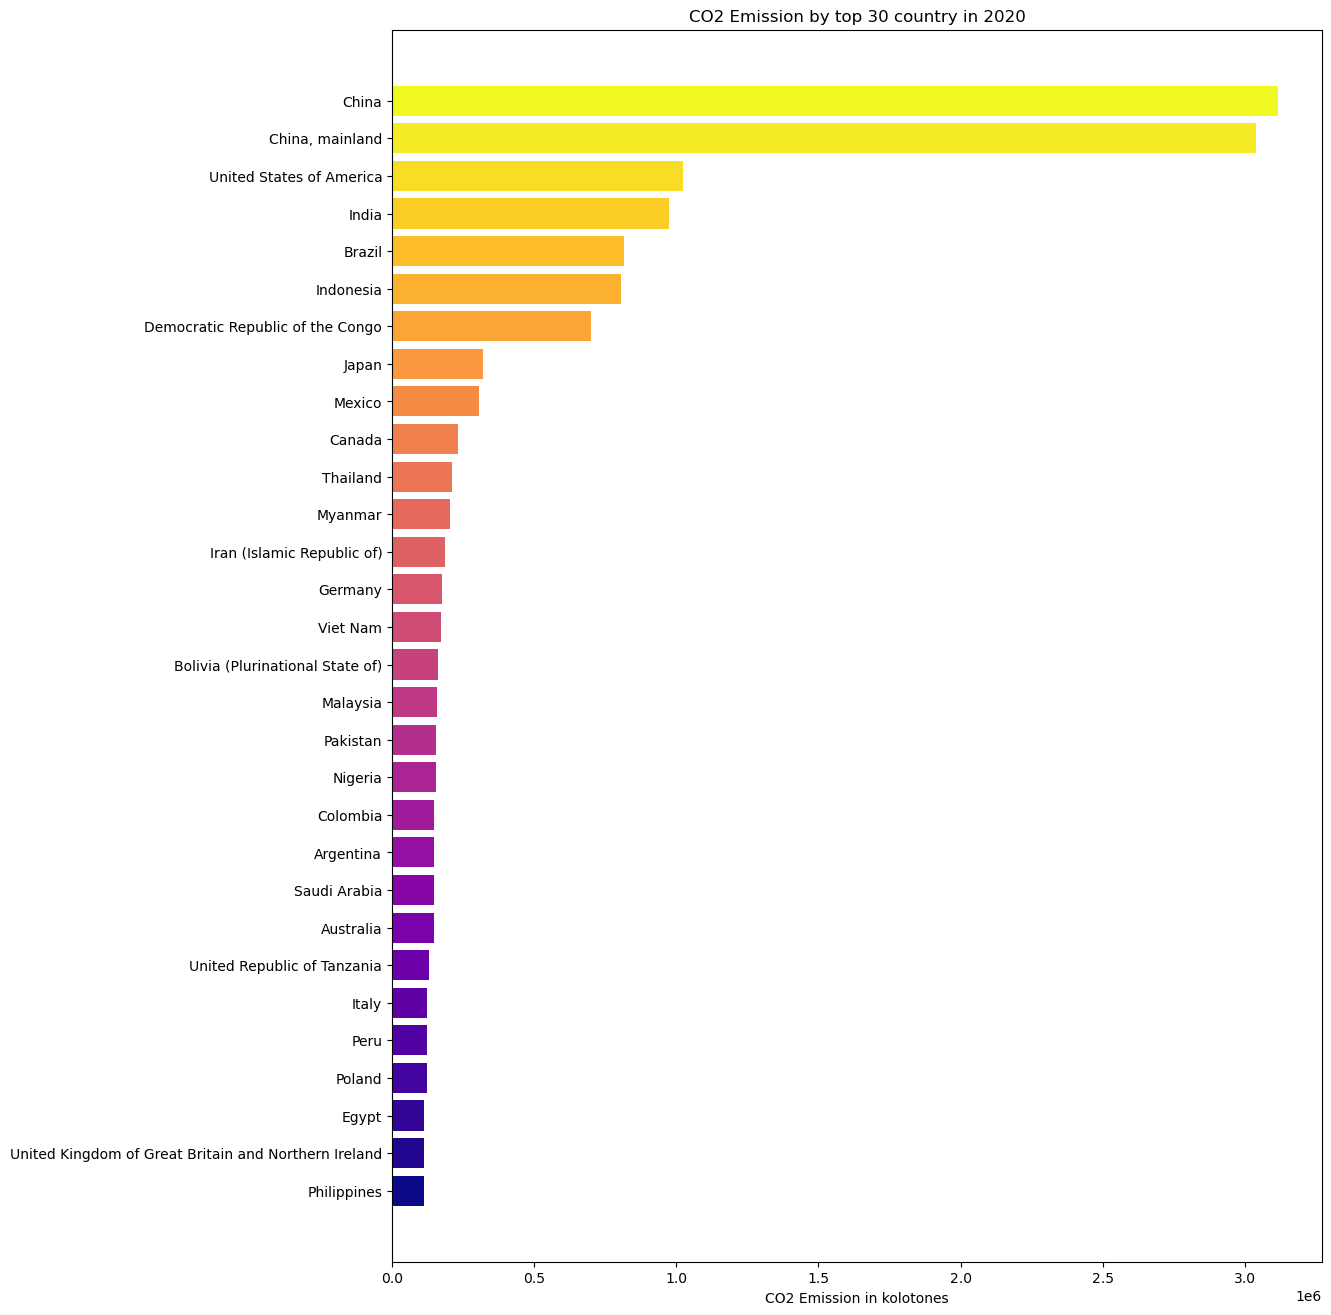

In [40]:
def country_emission(df,year, length = 30):
        df = df.copy()
        plot = df.loc[df["Year"]==year]
        plot = plot.sort_values(by = "total_emission", ascending = True).tail(length)
        colors = plt.cm.get_cmap('plasma', len(plot))
        plt.figure(figsize=(12, 16))
        plt.barh(plot['Area'], 
                plot['total_emission'], 
                color=colors(range(len(plot))))
        plt.title(f'CO2 Emission by top {length} country in {year}')
        plt.xlabel('CO2 Emission in kolotones')

        plt.show()

country_emission(df, year=2020)

# Insights

## Overall Trend

* CO2 Emissions: The graph clearly shows a large variation in CO2 emissions among the top 30 countries in 2020. There is a significant downward trend, with the highest emitting countries at the top and the lowest emitting countries at the bottom.

## Specific Observations

### Top Emitters:

China and the United States of America are the top two emitters, with China having significantly higher emissions.
India, Brazil, and Indonesia follow as the next major emitters.

### Middle Emitters:

Countries like Japan, Mexico, Canada, and Thailand fall in the middle range of CO2 emissions.

### Lower Emitters:

Most of the countries in the lower half of the graph have significantly lower CO2 emissions compared to the top emitters.

## Possible Explanations

* Economic Development: Countries with higher levels of industrialization and economic activity tend to have higher CO2 emissions.
* Energy Mix: The reliance on fossil fuels for energy generation contributes significantly to CO2 emissions.
* Population: Countries with larger populations generally have higher energy consumption and, consequently, higher CO2 emissions.
 
## Summary
The graph highlights the significant variation in CO2 emissions among the top 30 countries in 2020. China and the United States of America are the dominant emitters, while most other countries have significantly lower emissions. The differences in CO2 emissions can be attributed to factors like economic development, energy mix, and population size.

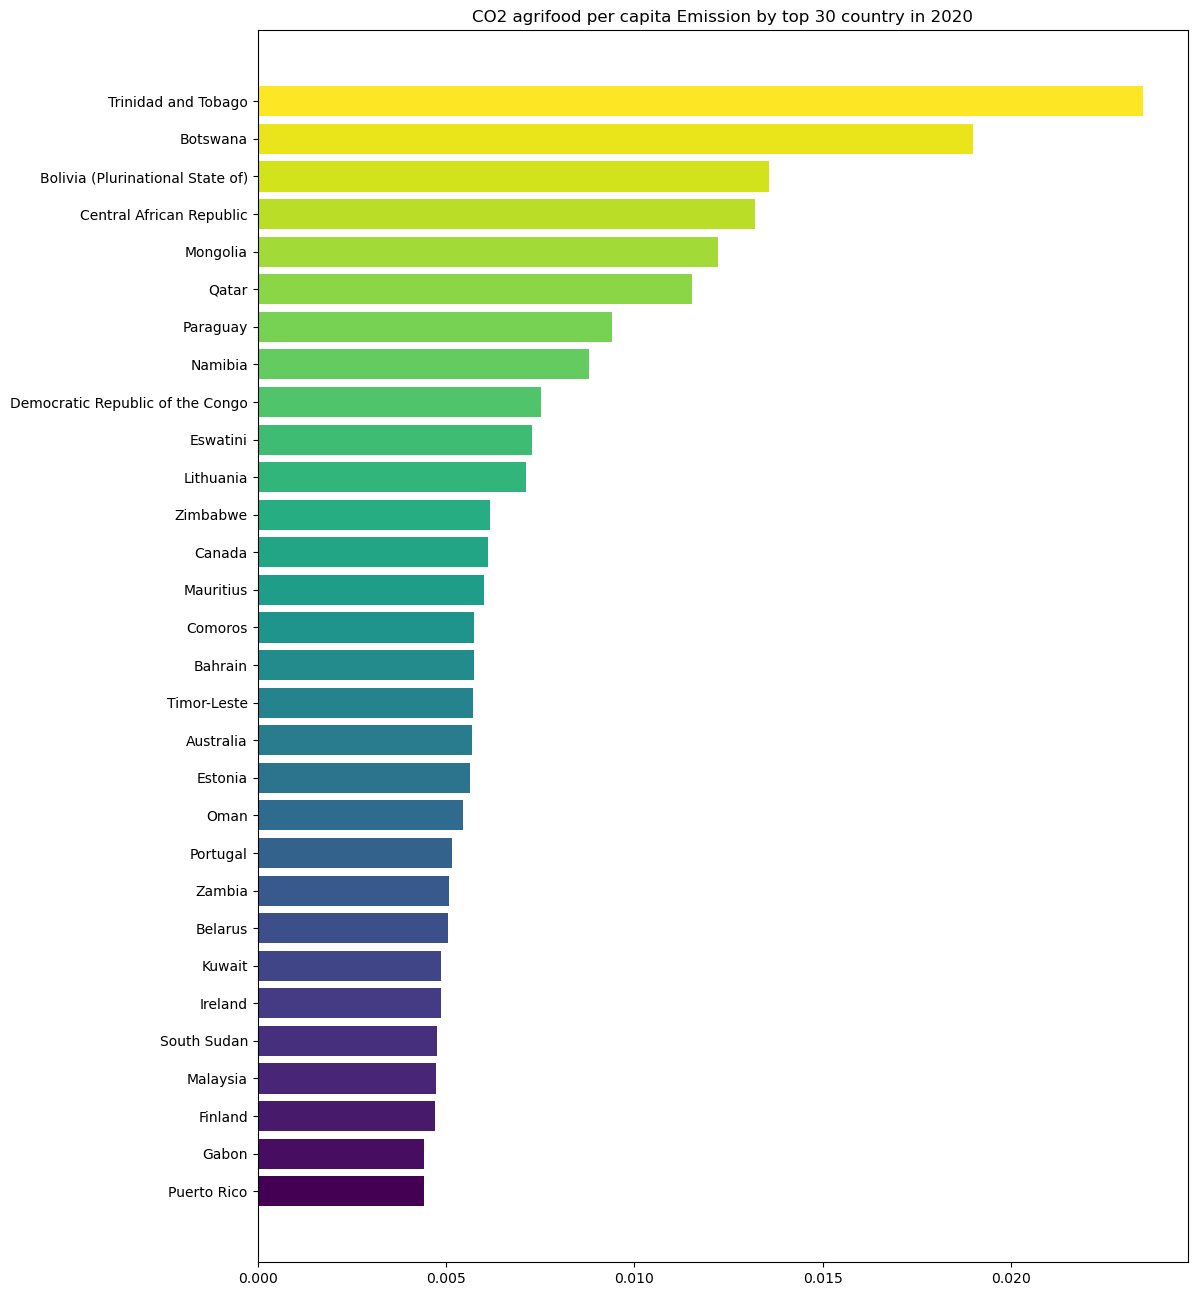

In [41]:
# let's create a feature with co2 per capita compsuntion in kilotones
df["per_capita_emission_kt"] = df["total_emission"] / df["pop_tot"] 

def percapita_emission(df,year, length = 30):
        df = df.copy()
        # let's remove small island or counties ehit this filter
        plot = df.loc[(df["Year"]==year) & (df["pop_tot"] > 800000)]
        plot = plot.sort_values(by = "per_capita_emission_kt", ascending = True).tail(length)
        colors = plt.cm.get_cmap('viridis', len(plot))
        plt.figure(figsize=(12, 16))
        plt.barh(plot['Area'], 
                plot['per_capita_emission_kt'], 
                color=colors(range(len(plot))))
        plt.title(f'CO2 agrifood per capita Emission by top {length} country in {year}')
        plt.show()

percapita_emission(df, year=2020, length=30)

# Insights

## Overall Trend

Per Capita Agrifood CO2 Emissions: The graph shows a significant variation in per capita agrifood CO2 emissions among the top 30 countries in 2020. There is a clear downward trend, with the highest emitting countries at the top and the lowest emitting countries at the bottom.

## Specific Observations

### Top Emitters:

Trinidad and Tobago, Botswana, and Bolivia (Plurinational State of) are the top three emitters in terms of per capita agrifood CO2 emissions.

### Middle Emitters:
Countries like Central African Republic, Mongolia, and Qatar fall in the middle range of per capita agrifood CO2 emissions.
### Lower Emitters:
Most of the countries in the lower half of the graph have significantly lower per capita agrifood CO2 emissions compared to the top emitters.

## Possible Explanations

* Agricultural Practices: The type of agricultural practices employed, such as intensive farming with high fertilizer and pesticide use, can contribute to higher CO2 emissions.
* Dietary Patterns: The consumption of meat-heavy diets can lead to higher CO2 emissions from livestock production.
* Land Use: Deforestation for agriculture can release stored carbon into the atmosphere.
    
## Summary
The graph highlights the significant variation in per capita agrifood CO2 emissions among the top 30 countries in 2020. A few countries stand out as high emitters, while most countries have relatively low per capita emissions. The differences in emissions can be attributed to factors like agricultural practices, dietary patterns, and land use.

C:\Users\w5123089\AppData\Local\Temp\ipykernel_27188\2224811895.py:27: UserWarning:

FixedFormatter should only be used together with FixedLocator



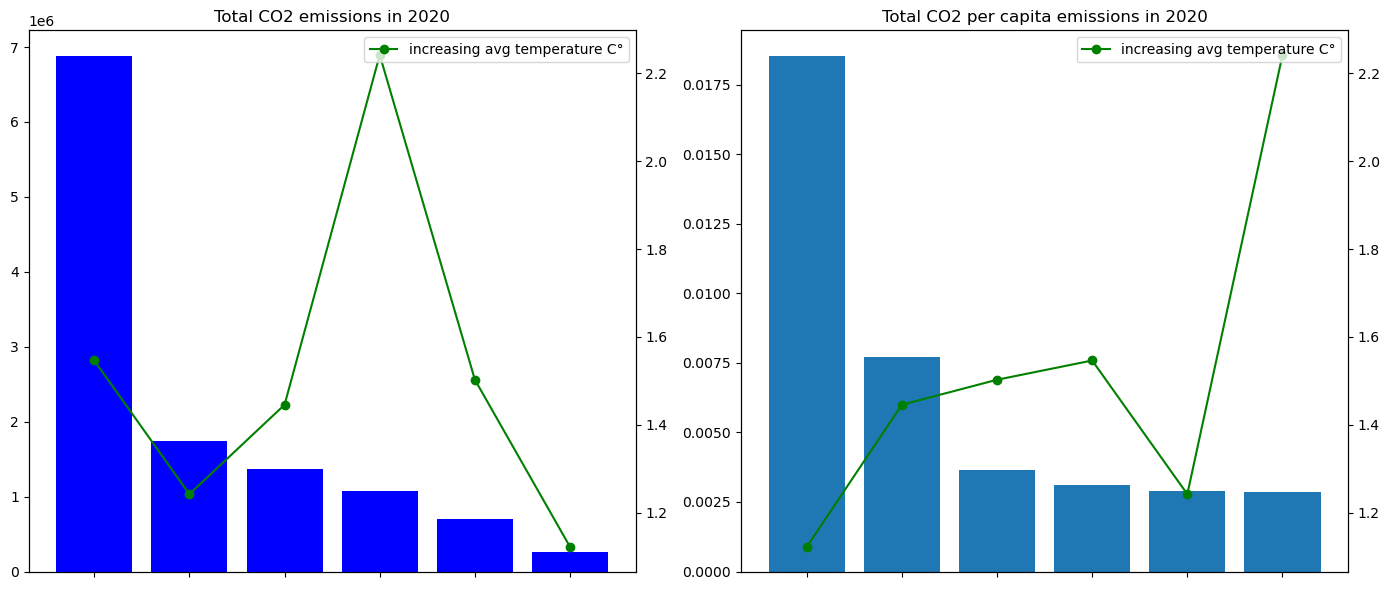

In [42]:
def continental_emission(year =2020):
    continent_df = df.loc[(df.pop_tot > 500000) & (df.Year == year)]\
        .groupby("continent")\
        .agg({"total_emission":"sum",
            "Average Temperature °C":"median",
            "per_capita_emission_kt":"mean"}).reset_index()
    continent_df = continent_df.sort_values(by="total_emission", ascending=False)
    colors = plt.cm.get_cmap('viridis', len(continent_df))

    fig, ax = plt.subplots(1, 2, figsize=(14, 6))
    ax[0].bar(continent_df["continent"], continent_df.total_emission, color="blue")
    ax[0].set_title(f"Total CO2 emissions in {year}")

    ax2 = ax[0].twinx() 
    ax2.plot(continent_df["continent"], continent_df["Average Temperature °C"], color='green', marker='o')
    ax2.legend(["increasing avg temperature C°"], loc='upper right') 


    continent_df = continent_df.sort_values(by="per_capita_emission_kt", ascending=False)
    ax[1].bar(continent_df["continent"], continent_df["per_capita_emission_kt"])
    ax[1].set_title(f"Total CO2 per capita emissions in {year}")
    ax3 = ax[1].twinx() 
    ax3.plot(continent_df["continent"], continent_df["Average Temperature °C"], color='green', marker='o')
    ax3.legend(["increasing avg temperature C°"], loc='upper right')

    for axis in ax:
        axis.set_xticklabels(axis.get_xticklabels(), rotation='vertical')

    plt.tight_layout()
    plt.show()

continental_emission(year =2020)

# Insights

## Overview

These two graphs present data on global CO2 emissions in 2020, focusing on both total emissions and emissions per capita. The vertical axis represents the amount of CO2 emissions, while the horizontal axis likely represents different countries or regions.

## Total CO2 Emissions in 2020

* Dominant Emitters: The graph clearly shows that a few countries or regions are responsible for the majority of global CO2 emissions. The tallest bar represents a significant contributor, likely China or the United States.
* Emission Gap: There's a significant gap between the top emitters and the rest. This suggests that a small number of countries drive a large portion of global emissions.
* Decreasing Trend: The green line overlaid on the bars indicates a trend of increasing average global temperature as CO2 emissions increase. This aligns with the well-established scientific understanding of the greenhouse effect.

## Total CO2 per capita emissions in 2020

Per Capita Emissions: This graph focuses on CO2 emissions per person, providing a different perspective on the distribution of emissions.

* Variation: The bars show significant variation in per capita emissions across different countries or regions. Some countries have much higher per capita emissions than others.
* Temperature Correlation: The green line again highlights the correlation between increasing CO2 emissions and rising global temperatures.

## Key Insights

* Global Inequality: The first graph emphasizes the unequal distribution of CO2 emissions among countries, with a few major emitters dominating the global total.
* Individual Responsibility: The second graph highlights the individual contribution to global emissions. Countries with high per capita emissions have a greater responsibility to reduce their carbon footprint.
* Climate Change Impact: Both graphs reinforce the link between CO2 emissions and global warming. Reducing emissions is crucial to mitigate climate change and its associated impacts.

By analyzing these aspects, we can develop more targeted strategies to reduce CO2 emissions and address the challenges of climate change.

# Correlation Matrix

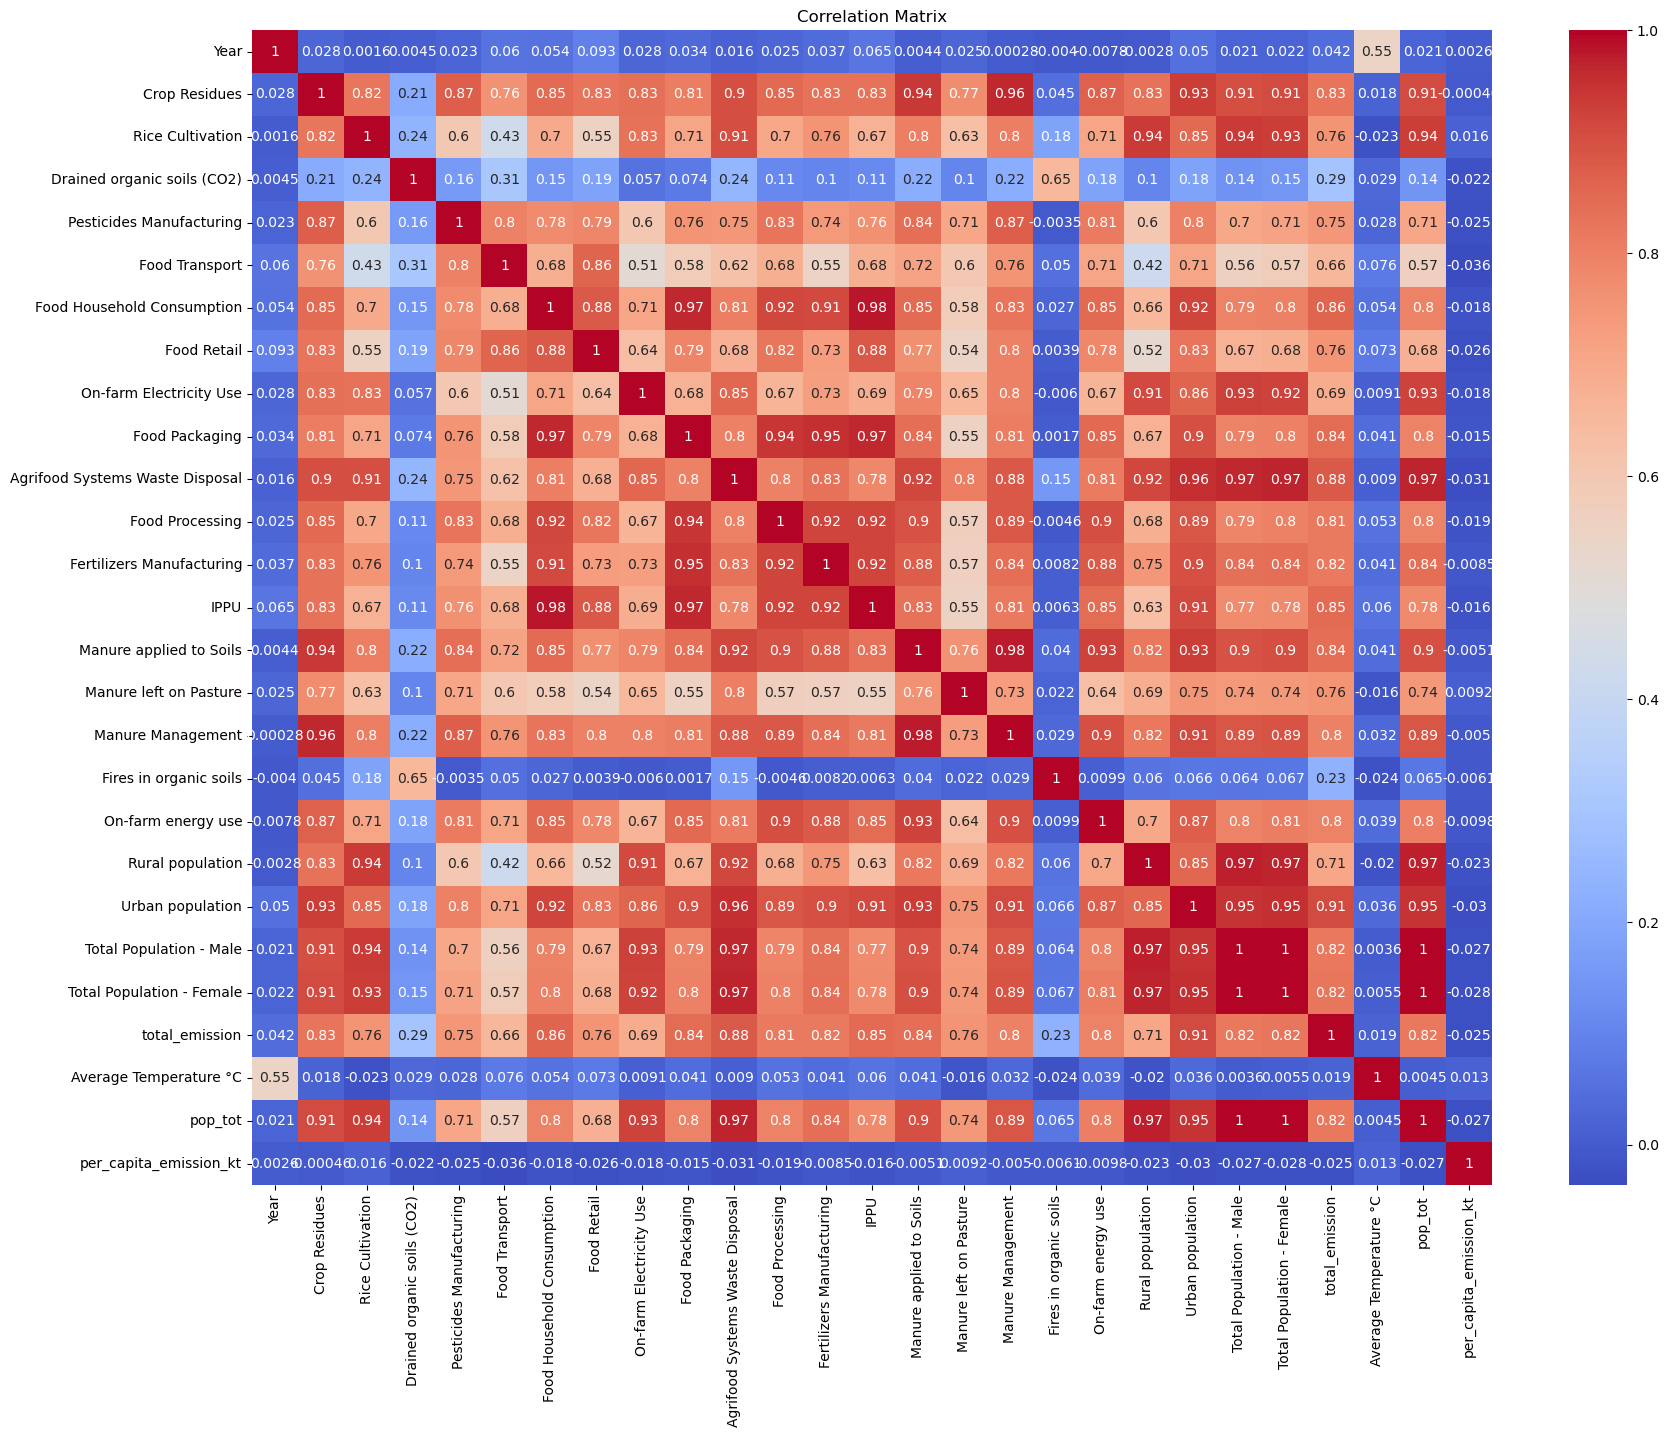

In [43]:
#Plotting correlation matrix
plt.figure(figsize=(20, 15))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Key Insights from the Correlation Matrix:

## 1. Strong Positive Correlations:

There are strong positive correlations between several variables, indicating that they tend to move in the same direction. 

For example:

* Crop Residues and Rice Cultivation: This suggests that areas with high crop residue production are often associated with significant rice cultivation.
* Food Household Consumption and Food Retail: This indicates a strong link between food consumption and retail activities.
* Manure Applied to Soils and Manure Left on Pasture: This suggests that these two practices are often related, perhaps due to similar agricultural practices.
* Total Population (Male and Female) and Total Emissions: This indicates that a larger population generally leads to higher total emissions.

## 2. Moderate Positive Correlations:

There are also moderate positive correlations between various variables, suggesting a weaker but still significant 
relationship.

For instance:

* Pesticides Manufacturing and Food Transport: This suggests that areas with significant pesticide manufacturing often have higher food transportation needs.
* Fertilizers Manufacturing and Food Processing: This indicates a connection between fertilizer production and food processing activities.

## 3. Negative Correlations:

There are a few negative correlations, indicating that these variables tend to move in opposite directions. 

For example:

* Drained Organic Soils and Food Household Consumption: This suggests that areas with more drained organic soils may have different dietary patterns or food consumption habits.

## Overall Interpretation:
The correlation matrix provides a snapshot of the relationships between various factors related to agriculture, food systems, and environmental impact. It highlights the complex interplay between these factors and suggests areas for further investigation.

# Machine Learning

In [44]:
def regressor_imputer(df, feature, max_depth = 6):
    """ This function replace missing values with
        RanfomForestRegressor forecasting """

    df_filled = df.copy()

    if df_filled[feature].isna().any():
        missing_data = df_filled[df_filled[feature].isna()]
        non_missing_data = df_filled.dropna(subset=[feature])

        X_train = non_missing_data.drop(columns=[feature])
        y_train = non_missing_data[feature]

        imputer = SimpleImputer()
        X_train_imputed = imputer.fit_transform(X_train)
        X_missing = missing_data.drop(columns=[feature])
        X_missing_imputed = imputer.transform(X_missing)

        rf = RandomForestRegressor(max_depth = max_depth)
        rf.fit(X_train_imputed, y_train)

        y_missing_pred = rf.predict(X_missing_imputed)

        df_filled.loc[df_filled[feature].isna(), feature] = y_missing_pred

    return df_filled

In [45]:
num_features = [col for col in df.columns if df[col].dtypes in ["int64", "float64"]]
cat_features = [col for col in df.columns if df[col].dtypes in ["object"]]
# let's create a list with onli missing values feature and the replace them with regression 
missing_values = df[num_features].isna().sum()
missing_list=missing_values[missing_values > 0].keys().tolist()

In [46]:
from tqdm.notebook import tqdm

numeric_only = df[num_features ]
def replace_missing(df, missing_list):
    numeric_df = df.copy()
    for feature in tqdm(missing_list):
        numeric_df = regressor_imputer(numeric_df, feature)
    return numeric_df

num_df = replace_missing(numeric_only, missing_list)

0it [00:00, ?it/s]

In [47]:
from sklearn.preprocessing import LabelEncoder
cat_df = df[cat_features].copy() 

label_encoder = LabelEncoder()
for column in cat_df.columns:
    cat_df.loc[:, column] = label_encoder.fit_transform(cat_df[column])

In [48]:
final_df = pd.concat([cat_df,num_df], axis =1)
X = final_df.drop(columns =["Average Temperature °C"])
y =final_df["Average Temperature °C"]

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Simple Linear Regression Model

<AxesSubplot:xlabel='total_emission', ylabel='Average Temperature °C'>

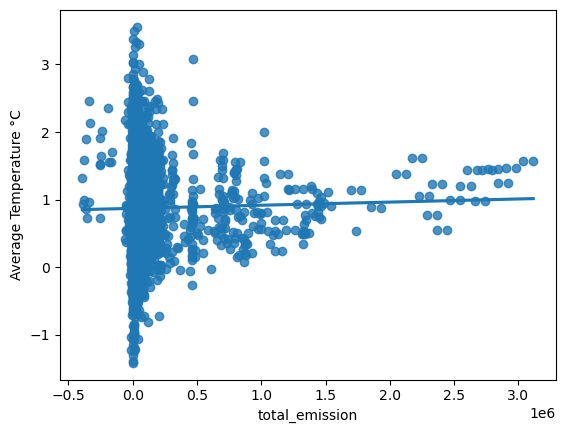

In [56]:
# Check the correlation between independent feature (total_emission) and target variable (Average Temperature °C)

sns.regplot(x = 'total_emission', y = 'Average Temperature °C', data=df, ci=None)

# Splitting the Data

In [57]:
# Split the selected independent feature (total_emission) and target variable (Average Temperature °C) for SIMPLE Linear Regression

X = df[['total_emission']] 
y = df['Average Temperature °C'] 

### Train | Test Split

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
# Display the shapes of the resulting datasets

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5572, 1)
X_test shape: (1393, 1)
y_train shape: (5572,)
y_test shape: (1393,)


## Model

In [60]:
from sklearn.linear_model import LinearRegression

model_simple_lin_reg = LinearRegression() 

## Training the Model

In [61]:
model_simple_lin_reg.fit(X_train, y_train)

LinearRegression()

## Predicting Test Data

In [62]:
# Predict using the model on the test data

y_train_pred = model_simple_lin_reg.predict(X_train)
y_pred = model_simple_lin_reg.predict(X_test)

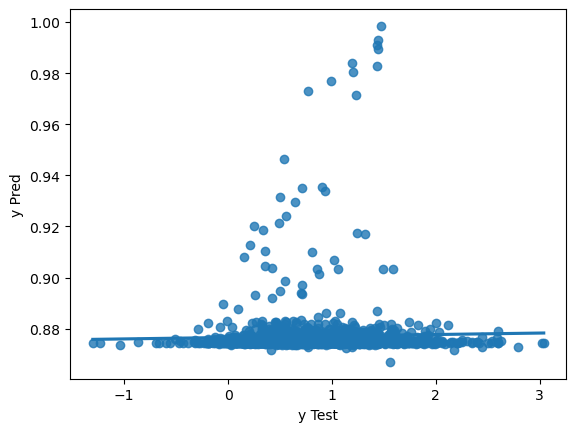

In [63]:
sns.regplot(x=y_test, y=y_pred, ci=None)

plt.xlabel('y Test')
plt.ylabel('y Pred')

plt.show()

## Evaluating The Simple Linear Regression Model

In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


def train_val(y_train, y_train_pred, y_test, y_pred, i): 
    
    scores = {
    i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}
    }
    
    return pd.DataFrame(scores)

### Performance Metrics

In [65]:
slr_score = train_val(y_train, y_train_pred, y_test, y_pred, 'linear')
slr_score

linear_train  linear_test
R2        0.000270    -0.000424
mae       0.428167     0.431023
mse       0.309471     0.306700
rmse      0.556301     0.553805

# Evaluation metrics for a linear regression model on both training and testing data. 

## metrics:

### R2 Score:

* Training: 0.000270
* Testing: -0.000424

An R2 score of 0 indicates that the model explains none of the variance in the data. A negative R2 score suggests that the model performs worse than a simple mean model. This is a very poor performance for both training and testing data.

### MAE (Mean Absolute Error):

* Training: 0.428167
* Testing: 0.431023

MAE measures the average absolute difference between the predicted values and the actual values. A lower MAE indicates better model performance. In this case, the model's performance is similar on both training and testing data, but the values are relatively high, suggesting that the model's predictions are not very accurate.

### MSE (Mean Squared Error):

* Training: 0.309471
* Testing: 0.306700

MSE measures the average squared difference between the predicted values and the actual values. A lower MSE indicates better model performance. Similar to MAE, the model's performance is comparable on both training and testing data, but the values are relatively high, indicating a significant difference between the predicted and actual values.   
 
 
### RMSE (Root Mean Squared Error):

* Training: 0.556301
* Testing: 0.553805

RMSE is the square root of MSE. It provides a more interpretable measure of the average error in the same units as the target variable. Again, the model's performance is similar on both training and testing data, but the values are relatively high, indicating significant prediction errors.

Overall, the model's performance is very poor on both training and testing data. This suggests that the linear regression model is not suitable for this particular dataset. Several potential reasons could explain this poor performance:

* 1. Non-linear Relationship: The relationship between the features and the target variable might be non-linear, and a linear model may not be able to capture such relationships effectively.
* 2. Feature Importance: The features used in the model might not be the most relevant or informative for predicting the target variable.
* 3. Data Quality: The quality of the data, such as missing values, outliers, or noise, can significantly impact the model's performance.

To improve the model's performance, consider exploring alternative models like polynomial regression, decision trees, or neural networks. 

Additionally, feature engineering, data cleaning, and hyperparameter tuning can help optimize the model's performance.

## Random Forest Regression Model and Bagging Regression Model

In [66]:
final_df = pd.concat([cat_df,num_df], axis =1)

def df_split(final_df, year = 2016):
    final_df =final_df.copy()
    x_train = final_df.loc[final_df.Year < year]
    y_train = x_train["Average Temperature °C"]
    x_train = x_train.drop(columns ="Average Temperature °C")    

    x_test =final_df.loc[final_df.Year >= year]
    y_test =x_test["Average Temperature °C"]
    x_test = x_test.drop(columns ="Average Temperature °C")        
    return x_train,y_train,x_test,y_test

In [67]:
x_train,y_train,x_test,y_test = df_split(final_df)

In [68]:
def model_evaluation(x_train,x_test,y_train,y_test):
    models = {"RandomForestRegressor": RandomForestRegressor(),
        "BaggingRegressor":BaggingRegressor()
    }

    for model_name, model in models.items():
        model.fit(x_train, y_train)
        test_pred = model.predict(x_test)
        folds = KFold(n_splits=5)

        mae = mean_absolute_error(y_test, test_pred)
        mse = mean_squared_error(y_test, test_pred)
        cv_score=cross_val_score(model,x_train,y_train,cv=folds, scoring = "neg_mean_absolute_error")
        cv_score = np.mean(cv_score)

        print(model_name)
        print("MAE:", round(mae, 4))
        print("MSE:", round(mse, 4))
        print("Cross_val_score", cv_score)
        print("------------"*3)
        
model_evaluation(x_train,x_test,y_train,y_test)

RandomForestRegressor
MAE: 0.2835
MSE: 0.1388
Cross_val_score -0.30481865683353787
------------------------------------
BaggingRegressor
MAE: 0.2985
MSE: 0.153
Cross_val_score -0.31879457185830506
------------------------------------


## Evaluation Metrics:

* 1. MAE (Mean Absolute Error): This measures the average absolute difference between the predicted values and the actual values. Lower MAE indicates better model performance.

* 2. MSE (Mean Squared Error): This measures the average squared difference between the predicted values and the actual values. Lower MSE indicates better model performance.   
 
Cross-val_score: This is a cross-validation score, which provides an estimate of how well the model generalizes to unseen data. Higher cross-validation scores indicate better model performance.

### Model Performance Comparison:

Based on the provided metrics, we can make the following observations:

* MAE and MSE: Both models have similar MAE and MSE values, indicating that they have comparable accuracy in predicting the target variable.
* Cross-val_score: Both models have negative cross-validation scores, which might seem counterintuitive. However, negative scores can occur in certain evaluation metrics or datasets. In this case, the BaggingRegressor has a slightly higher cross-validation score, suggesting that it might generalize slightly better to unseen data.

Overall, both models seem to have comparable performance based on the given metrics. However, it's important to consider other factors such as the specific dataset, the problem domain, and the desired outcome when selecting a model. Additionally, it's recommended to perform further analysis, such as feature importance analysis, to gain deeper insights into the model's behavior.

Note: The negative cross-validation scores might seem counterintuitive. In some cases, negative scores can occur due to specific evaluation metrics or the nature of the dataset. It's important to interpret the scores relative to each other and in the context of the specific problem.